### Теоретическая часть

#### 1. Если мы рассчитали 95% доверительный интервал для среднего значения, то какие из следующих утверждений являются верными?

##### Ответ: 2, 3
##### 2) Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.
##### 3) Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.

#### 2. Если мы увеличиваем объём выборки в два раза (при условии, что показатель стандартного отклонения остается неизменным), то 95% доверительный интервал:

##### 1) Стал более узким

#### 3. В центре 95% доверительного интервала, рассчитанного по выборочным значениям, находится:

##### 2) Выборочное среднее значение

#### 4. Часто на практике нулевая гипотеза отклоняется, и различия считаются статистически достоверными, если p < 0,05. Однако часто в статистике используется более жёсткий критерий достоверности различий, например, при условии, что p < 0,01. Значение p-уровня значимости, которое выбирается, в качестве порога обозначается буквой α (альфа). Например, если исследователь решил, что α = 0,05, то и нулевая гипотеза будет отклоняться при условии, что p < 0,05.

#### Если в определённой ситуации весьма рискованно отклонить нулевую гипотезу, когда она на самом деле верна, то лучше использовать показатель α равный:

##### 2) 0,001

#### 5. Данные некоторого исследования сообщают нам, что средний рост детей в 14 лет составляет 166 сантиметров. Однако это лишь выборочная оценка, и исследователи рассчитали 95% доверительный интервал, который составил [160, 172]. Укажите верные утверждения:

##### 1) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 173.
##### 3) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 158.

#### 6. Предположим, нулевой гипотезой вашего исследования являлось предположение, что конверсия в генеральной совокупности равняется 0.4. Вы получили p = 0,12 и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что конверсия в генеральной совокупности действительно равна 0.4. Как можно оценить результаты?

##### 1) Вы не совершали ни ошибку первого рода, ни ошибку второго рода.
##### Так как ошибка первого рода заключается в том, чтобы отклонить верную нулевую гипотезу, то мы здесь её не совершаем, поскольку нулевую гипотезу не отклонили, а она оказалась верной. Ошибка второго рода заключается в том, чтобы принять нулевую гипотезу, когда верна альтернативная. Гипотезу приняли, но альтернативная гипотеза не является верной. Поэтому здесь не совершается ошибка ни первого рода, ни второго. 

### Практическая часть

In [1]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import statsmodels
import scipy.stats as sts
from sklearn.utils import resample
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(41)

In [2]:
df = pd.read_csv('ab_datas.csv')
df.head(4)

,user_id,timestamp,group,landing_page,converted,revenue
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,100
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
 5   revenue       294478 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 13.5+ MB


In [4]:
df.describe()

,user_id,converted,revenue
count,294478.000000,294478.000000,294478.000000
mean,787974.124733,0.119659,101.967719
std,91210.823776,0.324563,103.602744
min,630000.000000,0.000000,0.000000
25%,709032.250000,0.000000,0.000000
50%,787933.500000,0.000000,100.000000
75%,866911.750000,0.000000,250.000000
max,945999.000000,1.000000,250.000000


In [5]:
n_rows = df.shape[0]
print(f'Число строк: {n_rows}')

Число строк: 294478


In [6]:
user_total = df.nunique()['user_id']
print(f'Число уникальных пользователей: {user_total}')

Число уникальных пользователей: 290584


In [7]:
mismatch_1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print(f'Из тестовой группы неверно направлены {len(mismatch_1)} пользователей')

mismatch_2 = df.query("group == 'control' and landing_page == 'new_page'")
print(f'Из контрольной группы неверно направлены {len(mismatch_2)} пользователей')

Из тестовой группы неверно направлены 1965 пользователей
Из контрольной группы неверно направлены 1928 пользователей


In [8]:
sum(df['revenue'].values) / n_rows

101.9677191504968

In [9]:
df_grp = df.groupby('group')
df_grp.describe()

user_id                                                   \
              count           mean           std       min       25%   
group                                                                  
control    147202.0  788123.098035  91278.896888  630002.0  709287.0   
treatment  147276.0  787825.226283  91142.800641  630000.0  708729.5   

                                         converted            ...            \
                50%        75%       max     count      mean  ...  75%  max   
group                                                         ...             
control    788053.5  867155.50  945998.0  147202.0  0.120399  ...  0.0  1.0   
treatment  787837.5  866693.75  945999.0  147276.0  0.118920  ...  0.0  1.0   

            revenue                                                         
              count        mean         std  min  25%    50%    75%    max  
group                                                                       
control    147202.0   87.431896  102.424926  0.0  0.0    0.0  250.0  250.0  
treatment  147276.0  116.496238  102.732069  0.0  0.0  100.0  250.0  250.0  

[2 rows x 24 columns]

In [10]:
#объём тестовой группы
n_rows_treat = len(df[df['group'] == 'treatment'])

#объём контрольной группы
n_rows_contr = n_rows - n_rows_treat

print(f'Соотношение размеров тестовой и контрольной групп: {n_rows_treat / n_rows_contr}')
print(f'Вероятность, что новый пользователь будет направлен на версию со старым дизайном: {n_rows_treat / n_rows}')
print(f'Вероятность, что новый пользователь будет направлен на версию с новым дизайном: {n_rows_contr / n_rows}')

Соотношение размеров тестовой и контрольной групп: 1.0005027105609978
Вероятность, что новый пользователь будет направлен на версию со старым дизайном: 0.5001256460584492
Вероятность, что новый пользователь будет направлен на версию с новым дизайном: 0.49987435394155083


In [11]:
revenue_contr = df.query("group == 'control'")['revenue'].mean()
revenue_treat = df.query("group == 'treatment'")['revenue'].mean()

z_score, p_value = sm.stats.proportions_ztest([revenue_treat, revenue_contr], [n_rows_treat, n_rows_contr])

print(f'Z-статистика = {z_score},  p_value = {p_value}')

Z-статистика = 2.032384860914258,  p_value = 0.04211470949619333


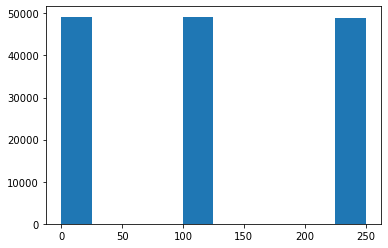

In [12]:
plt.hist(df.loc[df['group']=='treatment', 'revenue']);

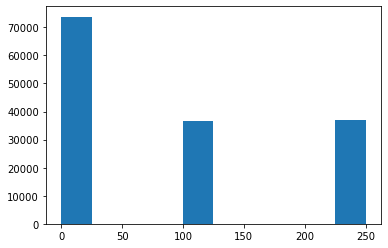

In [13]:
plt.hist(df.loc[df['group']=='control', 'revenue']);

In [14]:
a = df.loc[df['group']=='control', 'revenue'].values
b = df.loc[df['group']=='treatment', 'revenue'].values

In [15]:
a_means = []
b_means = []

for i in range(10000):
    a_boot = resample(a, replace=True, n_samples=len(a))
    b_boot = resample(b, replace=True, n_samples=len(b))
    
    a_means.append(a_boot.mean())
    b_means.append(b_boot.mean())
    
a_means = np.array(a_means)
b_means = np.array(b_means)

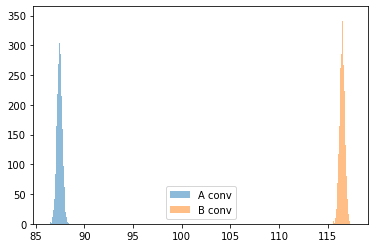

In [16]:
plt.hist(a_means, label='A conv', alpha=0.5, bins=100)
plt.hist(b_means, label='B conv', alpha=0.5, bins=100)

plt.legend()
plt.show()

Средний чек выше, пользователи тестовой группы покупают больше, но посчитанная статистика говорит о том, что результат является статистически незначимым.